In [47]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

raw_data = pd.read_csv('1.04.+Real-life+example.csv')
print(raw_data.describe(include = 'all'))




             Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN   

In [48]:

data = raw_data.drop(['Model'],axis = 1)
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [49]:
data.isnull().sum()
data_no_mv = data.dropna(axis = 0)
data_no_mv.describe(include = 'all')


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


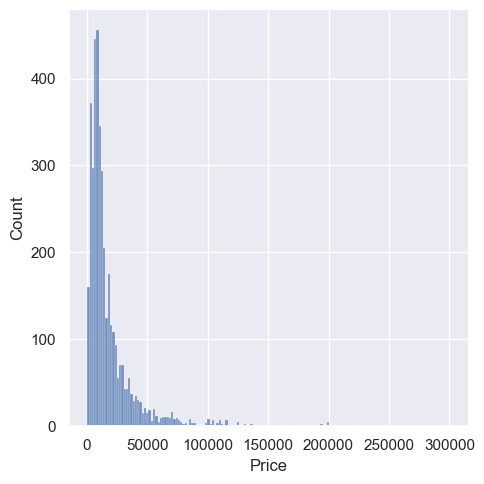

In [50]:
sns.displot(data_no_mv['Price'])
plt.show()

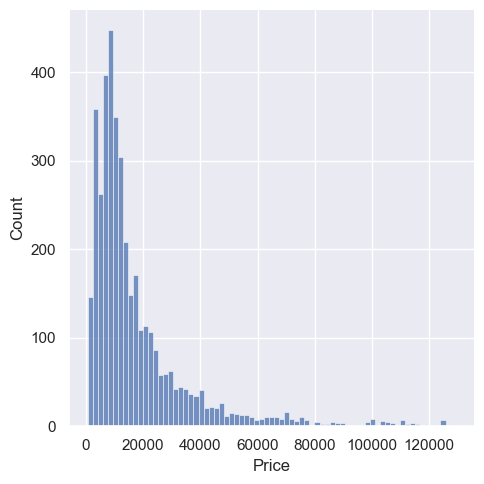

In [51]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price'] < q]

sns.displot(data_1['Price'])
plt.show()


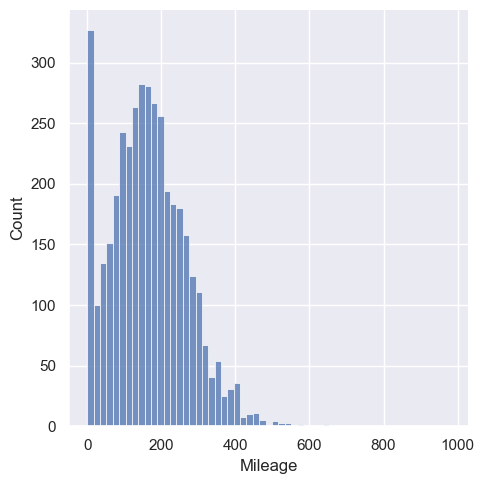

In [52]:
sns.displot(data_1['Mileage'])
plt.show()

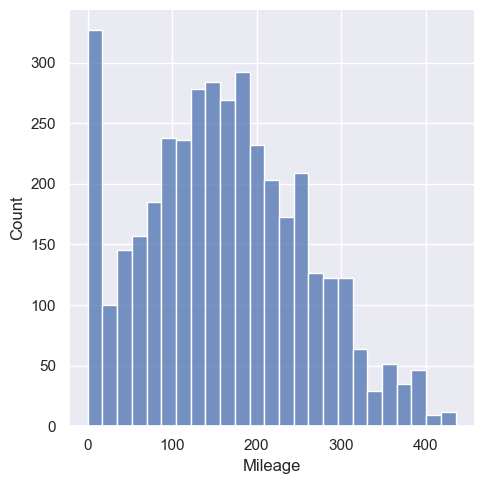

In [53]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < q]
sns.displot(data_2['Mileage'])
plt.show()

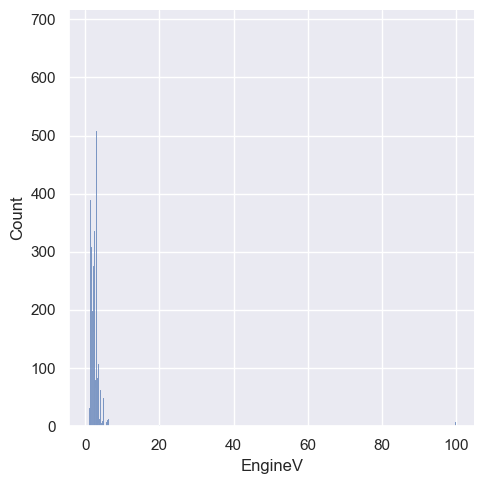

In [54]:
sns.displot(data_2['EngineV'])
plt.show()

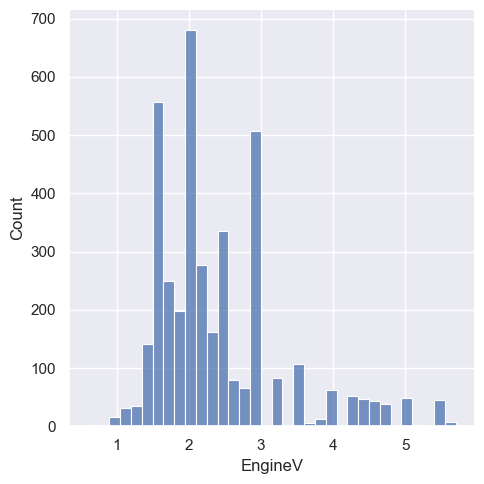

In [55]:
q = data_2['EngineV'].quantile(0.99)
data_3 = data_2[data_2['EngineV'] < q]
sns.displot(data_3['EngineV'])
plt.show()

In [56]:
data_4 = data_3[data_3['Year'] > 2000]
data_4.describe(include = 'all')
data_cleaned = data_4.reset_index(drop = True)


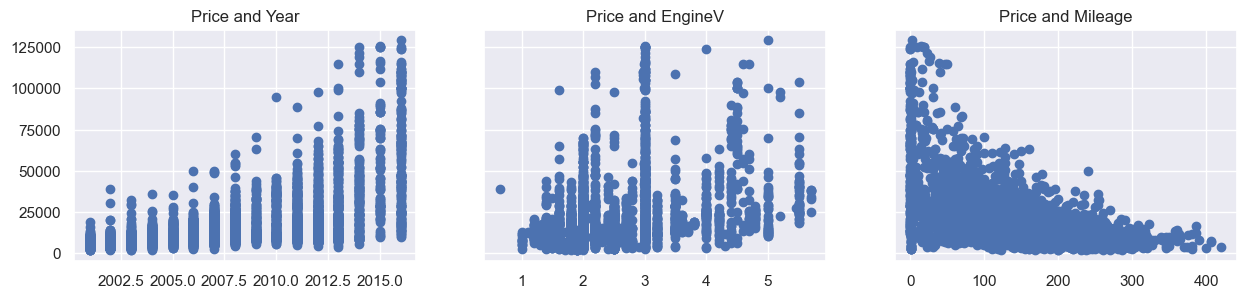

In [57]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) 
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()


In [58]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price

In [59]:
data_cleaned = data_cleaned.drop(['Price'],axis = 1)
data_cleaned.head()


,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
1,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
2,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
3,Audi,vagon,200,2.7,Diesel,yes,2006,9.560997
4,Renault,vagon,193,1.5,Diesel,yes,2012,9.287209


In [60]:
data_cleaned = pd.get_dummies(data_cleaned,drop_first = True)

In [64]:
from sklearn.model_selection import train_test_split

x = data_cleaned.drop(['log_price'],axis = 1)
y = data_cleaned['log_price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [65]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

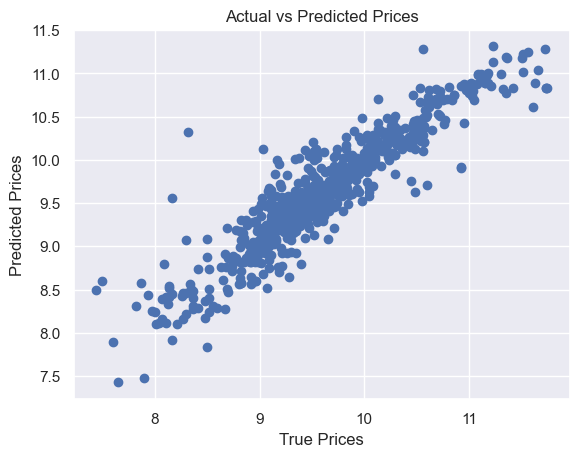

In [67]:
y_hat = reg.predict(x_test)

plt.scatter(y_test, y_hat)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()



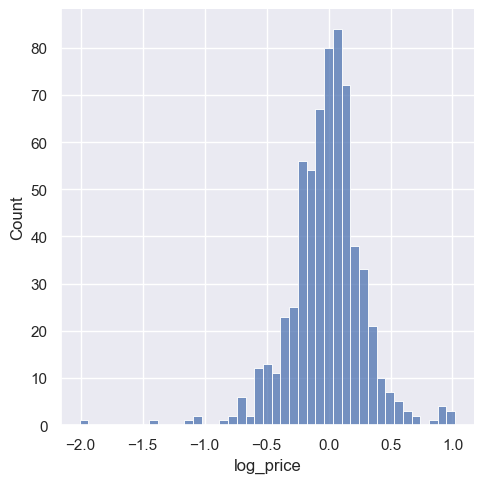

In [68]:
sns.displot(y_test - y_hat)
plt.show()

Calculating the R-Squared


In [71]:
reg.intercept_

-174.05746911566547

In [73]:
reg.score(x_train,y_train)

0.8685137461905571

In [74]:
x_train.shape

(2556, 18)

In [76]:
r2 =reg.score(x_train,y_train)
n =x_train.shape[0]
p =x_train.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2


0.8675808519971909